# **Tugas Besar Pembelajaran Mesin: Task 2**

Anggota Kelompok:
* Muhammad Tsaqif Ammar (1301194222)
* Mar'i Fauzan Rambe (1301194204)

### **Deskripsi Tugas**

Diberikan dataset pelanggan pada suatu dealer kendaraan, lakukan *classification*. ***Classification*** (*supervised learning*), pada konteks ini, adalah memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.




### **Library yang Dibutuhkan**

* `pandas`: untuk pra-pemrosesan dataset.
* `numpy`: untuk pemrosesan data saat training model.
* `math`: untuk memudahkan perhitungan saat kalkulasi jarak.
* `matplotplib.pyplot`: untuk visualisasi graf.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### **Mengimport Data Kendaraan**

In [ ]:
data_train = pd.read_csv("https://github.com/tsaqifammar/logistic-regression-kendaraan/blob/main/kendaraan_train.csv?raw=true")

print(f"Banyak baris data train: {len(data_train)}")
data_train.head(5)

Banyak baris data train: 285831


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
data_test = pd.read_csv("https://github.com/tsaqifammar/logistic-regression-kendaraan/blob/main/kendaraan_test.csv?raw=true")
print(f"Banyak baris data test: {len(data_test)}")

data_test.head(5)

Banyak baris data test: 47639


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


### **Eksplorasi dan Persiapan Data**

In [ ]:
# Mengecek banyak missing values pada tiap kolom
print(data_train.isnull().sum())
print(data_test.isnull().sum())

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [ ]:
# Mengecek tipe data dari tiap kolom
data_train.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
# Menghapus kolom tidak penting
data_train = data_train.drop(["id", "Kode_Daerah"], axis=1)
data_test = data_test.drop(["Kode_Daerah"], axis=1)

data_train

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
# Mengecek nilai-nilai yang ada pada kolom non-numerik
for col in data_train.select_dtypes(exclude=[np.number]).columns:
  print(col, data_train[col].unique())

Jenis_Kelamin ['Wanita' 'Pria' nan]
Umur_Kendaraan ['< 1 Tahun' '> 2 Tahun' '1-2 Tahun' nan]
Kendaraan_Rusak ['Tidak' 'Pernah' nan]


In [ ]:
# Konversi data kategorikal menjadi numerik
mappings = {
    "Jenis_Kelamin": {
      "Wanita": 0,
      "Pria": 1
    },
    "Umur_Kendaraan": {
        "< 1 Tahun": 0,
        "1-2 Tahun": 1,
        "> 2 Tahun": 2
    },
    "Kendaraan_Rusak": {
        "Tidak": 0,
        "Pernah": 1
    }
}

data_train.replace(mappings, inplace=True)
data_test.replace(mappings, inplace=True)

In [ ]:
# Mengisi missing values dengan rata-rata kolom
data_train = data_train.fillna(data_train.mean())

In [ ]:
# Mengecek banyak missing values setelah missing values replacement
data_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

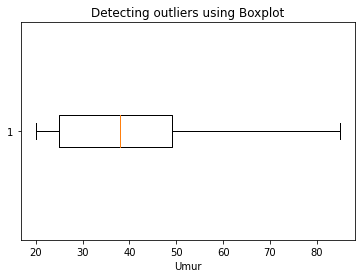

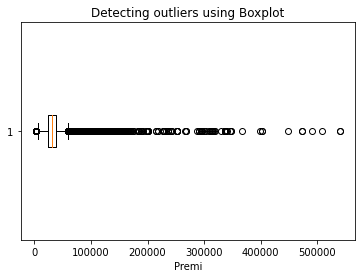

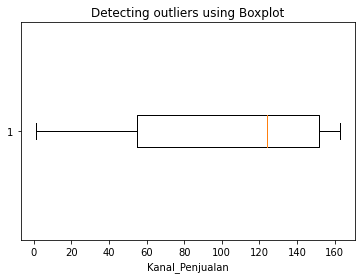

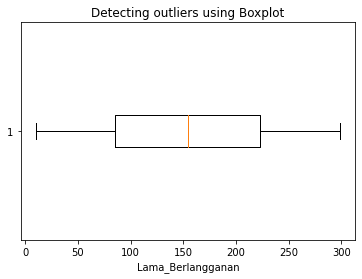

In [ ]:
# Melihat outlier
for feature in ["Umur", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]:
  plt.boxplot(data_train[feature], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(f"{feature}")
  plt.show()

Banyak baris: 220083



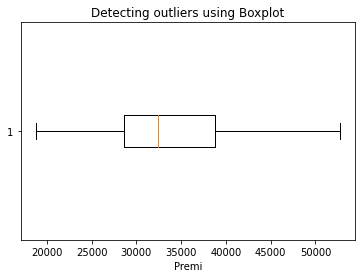

In [ ]:
# Menghilangkan outlier pada kolom Premi
min_threshold = data_train["Premi"].quantile(0.17)
max_threshold = data_train["Premi"].quantile(0.94)
data_train = data_train[ (min_threshold < data_train["Premi"]) & (data_train["Premi"] < max_threshold) ]
print(f"Banyak baris: {len(data_train)}\n")

plt.boxplot(data_train["Premi"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Premi")
plt.show()

In [ ]:
# Normalisasi data dengan min-max scaling
data_train = (data_train - data_train.min())/(data_train.max() - data_train.min())
data_test = (data_test - data_test.min())/(data_test.max() - data_test.min())
data_train

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,0.153846,1.0,1.0,0.0,0.000000,0.272363,0.932099,0.301038,0.0
1,1.000000,0.430769,1.0,0.0,1.0,1.000000,0.206774,0.172840,0.512111,0.0
2,0.540467,0.015385,1.0,1.0,0.0,0.000000,0.410782,0.981481,0.377163,0.0
4,1.000000,0.461538,1.0,0.0,1.0,0.504791,0.473282,0.537037,0.636678,0.0
5,1.000000,0.015385,1.0,1.0,0.0,0.000000,0.116584,0.932099,0.557093,0.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.000000,0.046154,1.0,1.0,0.0,0.000000,0.212306,0.932099,0.716263,0.0
285827,0.000000,0.015385,1.0,1.0,0.0,0.000000,0.762506,0.932099,0.138408,0.0
285828,0.000000,0.046154,1.0,1.0,0.0,0.000000,0.911547,0.932099,0.747405,0.0
285829,1.000000,0.738462,1.0,1.0,0.5,0.000000,0.345162,0.759259,0.899654,0.0


In [ ]:
# Mengambil sample 50000 data saja
data_train = data_train.sample(n=50000, random_state=1)

print(f"Banyak baris: {len(data_train)}\n")
data_train.head(5)

Banyak baris: 50000



,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
143547,1.0,0.738462,1.0,1.0,0.5,1.0,0.799406,0.074074,0.370242,0.0
69504,0.0,0.076923,1.0,1.0,0.0,0.0,0.680791,0.932099,0.249135,0.0
28389,0.0,0.046154,1.0,1.0,0.0,0.0,0.253443,0.932099,0.519031,0.0
214830,1.0,0.630769,1.0,1.0,0.5,1.0,0.939236,0.154321,0.352941,0.0
133926,1.0,0.815385,1.0,1.0,0.5,1.0,0.425583,0.154321,0.435986,0.0


In [ ]:
# Meng-export dataset hasil data preparation
data_train.to_csv('kendaraan_train_prepped.csv')
data_test.to_csv('kendaraan_test_prepped.csv')

### **Logistic Regression**

In [ ]:
# Memisahkan label serta mengkonversi data menjadi array numpy
X_train = data_train.drop(["Tertarik"], axis=1).to_numpy()
y_train = data_train["Tertarik"].to_numpy()
X_test = data_test.drop(["Tertarik"], axis=1).to_numpy()
y_test = data_test["Tertarik"].to_numpy()

# Menambahkan 1 pada tiap baris data
# untuk konstanta theta_0 pada fungsi prediksi/hipotesis
X_train_one = np.c_[ np.ones(X_train.shape[0]), X_train ]
X_test_one = np.c_[ np.ones(X_test.shape[0]), X_test ]

In [ ]:
from math import e

# Fungsi sigmoid untuk menghasilkan output dalam range [0,1]
def sigmoid(z):
  return 1/(1 + e**(-z))

# Fungsi prediksi/hipotesis
def pred(x, delta):
  return sigmoid(x.dot(delta))

def logistic_regression(X, y, alpha, max_iter):
  # Buat koefisien/weight tiap fitur sebagai 0 awalnya
  theta = np.zeros(X.shape[1])

  # Banyak baris data
  m = X.shape[0]

  # Lakukan perbaruan koefisien/weight
  # secara iteratif sebanyak max_iter kali
  for i in range(max_iter):
    # Menghitung gradien dari cost function J(theta)
    gradient = X.T.dot(pred(X, theta) - y)

    # Perbarui theta menuju titik minimum cost function J(theta)
    theta = theta - alpha/m * gradient
  return theta
  

In [ ]:
alpha = 0.1
max_iter = 50000

theta = logistic_regression(X_train_one, y_train, alpha, max_iter)
print(theta)

[-2.58287717  0.18675438 -1.28669923 -0.34146015 -2.56814099  1.39897418
  1.97344572 -0.04719864 -0.51615606  0.0461723 ]


In [ ]:
# Dilakukan klasifikasi menggunakan model yang sudah dilatih
preds = np.rint(pred(X_test_one, theta))
preds

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Perhitungan akurasi
accuracy = (preds == y_test).sum()/X_test.shape[0]
print(f"Akurasi: {accuracy*100:.3f}%")

Akurasi: 87.569%


### **Eksperimen**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lib = LogisticRegression()

model_lib.fit(X_train, y_train)

preds_lib = model_lib.predict(X_test)

In [ ]:
accuracy_lib = (preds_lib == y_test).sum()/X_test.shape[0]
print(f"Akurasi: {accuracy_lib*100:.3f}%")

Akurasi: 87.580%
